<a href="https://colab.research.google.com/github/thallyson1997/Anotador-Funcional-Proteico/blob/main/anotador_proteico_colab_antismash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anotador Proteico - Google Colab (antiSMASH Edition)

Este notebook identifica e analisa proteínas hipotéticas em **agrupamentos gênicos de metabólitos secundários** (BGCs) identificados pelo antiSMASH.

## Objetivo
Encontrar proteínas hipotéticas **dentro de clusters de biossíntese** e anotar suas funções por similaridade, mantendo o contexto do tipo de cluster (PKS, NRPS, terpenos, etc.).

## 🧬 Metodologia
1. **antiSMASH** identifica BGCs (Biosynthetic Gene Clusters) no genoma
2. **Este notebook** extrai proteínas hipotéticas dos clusters

3. **Relatórios** contextualizados por tipo de cluster - Opção de conectar ao Google Drive para salvar resultados

- Usa armazenamento temporário do Colab

## 🚀 Otimizado para Google Colab - Aceita resultados do antiSMASH (arquivos .regionXXX.gbk ou JSON)


## 0. Configuração Inicial do Google Colab

Execute esta seção primeiro para configurar o ambiente Colab.

In [ ]:
# Instalar dependências necessárias
print("=" * 70)
print("CONFIGURANDO AMBIENTE GOOGLE COLAB")
print("=" * 70)

# Instalar Biopython
print("\n📦 Instalando Biopython...")
!pip install -q biopython

print("\n✅ Ambiente configurado com sucesso!")
print("=" * 70)

CONFIGURANDO AMBIENTE GOOGLE COLAB

📦 Instalando Biopython...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.9 MB/s eta 0:00:00

✅ Ambiente configurado com sucesso!


In [ ]:
# (OPCIONAL) Montar Google Drive para salvar resultados permanentemente
from google.colab import drive
import os

montar_drive = input("Deseja montar o Google Drive para salvar resultados? (s/n): ").strip().lower()

if montar_drive == 's':
    print("\n📁 Montando Google Drive...")
    drive.mount('/content/drive')

    # Criar pasta para o projeto no Drive
    project_dir = '/content/drive/MyDrive/Anotador_Proteico'
    os.makedirs(project_dir, exist_ok=True)
    os.chdir(project_dir)
    print(f"✅ Diretório de trabalho: {project_dir}")
    print("📝 Todos os arquivos serão salvos no seu Google Drive")
else:
    # Usar armazenamento temporário do Colab
    os.chdir('/content')
    print("📝 Usando armazenamento temporário do Colab")
    print("⚠️  Arquivos serão perdidos ao desconectar da sessão")

# Criar pastas necessárias
os.makedirs('dados', exist_ok=True)
os.makedirs('outputs', exist_ok=True)
print("✅ Pastas criadas: dados/ e outputs/")

Deseja montar o Google Drive para salvar resultados? (s/n): s

📁 Montando Google Drive...
Mounted at /content/drive
✅ Diretório de trabalho: /content/drive/MyDrive/Anotador_Proteico
📝 Todos os arquivos serão salvos no seu Google Drive
✅ Pastas criadas: dados/ e outputs/


## 1. Upload dos Resultados do antiSMASH

### 📋 Pré-requisito: Executar antiSMASH

Antes de usar este notebook, você precisa rodar o antiSMASH no seu genoma:

1. **antiSMASH Web** (recomendado): https://antismash.secondarymetabolites.org/

   - Upload do seu genoma (FASTA ou GenBank)
   - Aguarde o processamento (pode demorar)
   - Baixe os resultados completos (ZIP)

├── meu_genoma.region001.gbk    # Cluster BGC 1
├── meu_genoma.region002.gbk    # Cluster BGC 2
├── ...                         # Outros clusters
├── meu_genoma.json             # Dados estruturados (preferencial)

2. **antiSMASH Local** (se instalado):
   antismash meu_genoma.gbk --output-dir antismash_results

### 📁 Estrutura esperada dos resultados:

### 📤 Upload dos resultados:
- **Opção 1**: Upload do arquivo ZIP dos resultados antiSMASH
- **Opção 2**: Upload manual dos arquivos .regionXXX.gbk (pasta dados/)
- **Opção 3**: Se montou o Drive, copie a pasta de resultados para `MyDrive/Anotador_Proteico/dados/antismash_output/`

Faça upload usando uma das opções acima.

In [ ]:
from google.colab import files
import os
import zipfile
import glob

# Diretório para resultados antiSMASH
antismash_dir = "dados/antismash_output"
os.makedirs(antismash_dir, exist_ok=True)

# Verificar se já existem arquivos do antiSMASH
region_files = glob.glob(f"{antismash_dir}/*.region*.gbk")
json_files = glob.glob(f"{antismash_dir}/*.json")

if region_files or json_files:
    print(f"✅ Resultados do antiSMASH já existem em: {antismash_dir}")
    print(f"   Arquivos de região (BGCs): {len(region_files)}")
    print(f"   Arquivos JSON: {len(json_files)}")
    print("\n📋 Arquivos encontrados:")
    for f in sorted(region_files[:5]):  # Mostrar primeiros 5
        print(f"   - {os.path.basename(f)}")
    if len(region_files) > 5:
        print(f"   ... e mais {len(region_files) - 5} arquivos")
else:
    print("="*70)
    print("UPLOAD DOS RESULTADOS DO antiSMASH")
    print("="*70)

    print("\n📤 Escolha o arquivo ZIP dos resultados do antiSMASH")
    print("   (Baixado do servidor web ou gerado localmente)\n")

    uploaded = files.upload()

    if uploaded:
        zip_filename = list(uploaded.keys())[0]

        # Verificar se é ZIP
        if zip_filename.endswith('.zip'):
            print(f"\n🔄 Extraindo {zip_filename}...")

            with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
                zip_ref.extractall(antismash_dir)

            print(f"✅ Arquivos extraídos em: {antismash_dir}")

            # Remover ZIP
            os.remove(zip_filename)

            # Verificar arquivos extraídos
            region_files = glob.glob(f"{antismash_dir}/**/*.region*.gbk", recursive=True)
            json_files = glob.glob(f"{antismash_dir}/**/*.json", recursive=True)

            print(f"\n📊 Resultados encontrados:")
            print(f"   Arquivos de região (BGCs): {len(region_files)}")
            print(f"   Arquivos JSON: {len(json_files)}")

            if not region_files and not json_files:
                print("\n⚠️  AVISO: Nenhum arquivo .region*.gbk ou .json encontrado!")
                print("   Verifique se o ZIP contém os resultados corretos do antiSMASH")

        # Upload direto de arquivo individual
        elif zip_filename.endswith('.gbk') or zip_filename.endswith('.json'):
            dest_path = os.path.join(antismash_dir, zip_filename)
            os.rename(zip_filename, dest_path)

            print(f"✅ Arquivo movido para: {dest_path}")
            file_size = os.path.getsize(dest_path) / (1024**2)
            print(f"   Tamanho: {file_size:.2f} MB")

        else:
            print(f"❌ Formato não reconhecido: {zip_filename}")
            print("   Esperado: .zip, .gbk ou .json")

    else:
        print("❌ Nenhum arquivo foi enviado")

UPLOAD DOS RESULTADOS DO antiSMASH

📤 Escolha o arquivo ZIP dos resultados do antiSMASH
   (Baixado do servidor web ou gerado localmente)



Saving genomic.zip to genomic.zip

🔄 Extraindo genomic.zip...
✅ Arquivos extraídos em: dados/antismash_output

📊 Resultados encontrados:
   Arquivos de região (BGCs): 17
   Arquivos JSON: 1


## 2. Análise e Carregamento dos Resultados antiSMASH

Agora vamos processar os arquivos do antiSMASH para extrair informações sobre os clusters BGC e suas proteínas.

In [ ]:
from Bio import SeqIO
import pandas as pd
import os
import glob
import json

antismash_dir = "dados/antismash_output"

print("="*70)
print("ANÁLISE DOS RESULTADOS DO antiSMASH")
print("="*70)

# Procurar arquivos de região BGC
region_files = glob.glob(f"{antismash_dir}/**/*.region*.gbk", recursive=True)
json_files = glob.glob(f"{antismash_dir}/**/*.json", recursive=True)

print(f"\n📊 Arquivos encontrados:")
print(f"   Regiões BGC (*.region*.gbk): {len(region_files)}")
print(f"   Arquivos JSON: {len(json_files)}")

if not region_files and not json_files:
    print("\n❌ Nenhum arquivo do antiSMASH encontrado!")
    print("   Execute a célula anterior para fazer upload dos resultados")
    bgc_data = None
else:
    # Estrutura para armazenar dados dos clusters
    bgc_data = []

    if region_files:
        print(f"\n🔄 Processando {len(region_files)} arquivos de região BGC...")

        for region_file in sorted(region_files):
            region_name = os.path.basename(region_file)

            # Extrair número da região
            import re
            match = re.search(r'region(\d+)', region_name)
            region_num = int(match.group(1)) if match else 0

            # Parsear arquivo GenBank da região
            try:
                for record in SeqIO.parse(region_file, "genbank"):
                    # Procurar informações do cluster nas features
                    cluster_type = "Unknown"

                    for feature in record.features:
                        if feature.type == "region":
                            # Extrair tipo do cluster
                            product = feature.qualifiers.get('product', ['Unknown'])[0]
                            cluster_type = product
                            break

                    bgc_info = {
                        'region_file': region_name,
                        'region_number': region_num,
                        'cluster_type': cluster_type,
                        'record_id': record.id,
                        'record': record
                    }
                    bgc_data.append(bgc_info)

                    print(f"   ✓ {region_name}: {cluster_type}")

            except Exception as e:
                print(f"   ⚠️  Erro ao processar {region_name}: {e}")

        print(f"\n✅ {len(bgc_data)} regiões BGC carregadas com sucesso!")

        # Estatísticas dos tipos de clusters
        if bgc_data:
            cluster_types = {}
            for bgc in bgc_data:
                ct = bgc['cluster_type']
                cluster_types[ct] = cluster_types.get(ct, 0) + 1

            print(f"\n📊 Distribuição dos tipos de clusters:")
            for ct, count in sorted(cluster_types.items(), key=lambda x: x[1], reverse=True):
                print(f"   {ct}: {count}")

    elif json_files:
        print("\n🔄 Processando arquivo JSON do antiSMASH...")
        # Implementação alternativa usando JSON será feita se necessário
        print("   ⚠️  Processamento via JSON ainda não implementado")
        print("   Use os arquivos .region*.gbk se possível")

ANÁLISE DOS RESULTADOS DO antiSMASH

📊 Arquivos encontrados:
   Regiões BGC (*.region*.gbk): 17
   Arquivos JSON: 1

🔄 Processando 17 arquivos de região BGC...
   ✓ NZ_JBALCJ010000005.1.region001.gbk: T1PKS
   ✓ NZ_JBALCJ010000006.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000007.1.region001.gbk: terpene
   ✓ NZ_JBALCJ010000007.1.region002.gbk: NRPS
   ✓ NZ_JBALCJ010000010.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000010.1.region002.gbk: terpene
   ✓ NZ_JBALCJ010000013.1.region001.gbk: terpene
   ✓ NZ_JBALCJ010000014.1.region001.gbk: hglE-KS
   ✓ NZ_JBALCJ010000014.1.region002.gbk: thioamitides
   ✓ NZ_JBALCJ010000019.1.region001.gbk: terpene-precursor
   ✓ NZ_JBALCJ010000028.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000029.1.region001.gbk: NRPS
   ✓ NZ_JBALCJ010000033.1.region001.gbk: crocagin
   ✓ NZ_JBALCJ010000034.1.region001.gbk: microviridin
   ✓ NZ_JBALCJ010000034.1.region002.gbk: NRPS
   ✓ NZ_JBALCJ010000036.1.region001.gbk: terpene
   ✓ NZ_JBALCJ010000042.1.region001.gbk: terpene

✅ 17 

## 2.1 Função de Identificação de Proteínas Hipotéticas

Esta função verifica se uma feature (característica) do genoma é uma proteína hipotética, procurando pela expressão "hypothetical protein" nos campos `product` e `note`.

In [ ]:
def is_hypothetical_protein(feature):
    if 'product' in feature.qualifiers:
        for product in feature.qualifiers['product']:
            if 'hypothetical protein' in product.lower():
                return True

    if 'note' in feature.qualifiers:
        for note in feature.qualifiers['note']:
            if 'hypothetical protein' in note.lower():
                return True

    return False

## 3. Extração de Proteínas Hipotéticas dos Clusters BGC

Agora vamos extrair **apenas as proteínas hipotéticas que estão dentro dos clusters de metabólitos secundários**, mantendo o contexto do tipo de cluster ao qual pertencem.

In [ ]:
# Criar pasta outputs se não existir
os.makedirs("outputs", exist_ok=True)

# Lista para armazenar os dados das proteínas hipotéticas
proteinas_hipoteticas = []

if bgc_data:
    print("="*70)
    print("EXTRAÇÃO DE PROTEÍNAS HIPOTÉTICAS DOS CLUSTERS BGC")
    print("="*70)

    # Abrir arquivo de log .txt
    with open("outputs/output_log.txt", "w") as log_file:
        contador = 0

        # Processar cada região BGC
        for bgc in bgc_data:
            region_file = bgc['region_file']
            region_num = bgc['region_number']
            cluster_type = bgc['cluster_type']
            record = bgc['record']

            log_file.write(f"\n{'='*70}\n")
            log_file.write(f"REGIÃO {region_num}: {region_file}\n")
            log_file.write(f"Tipo de cluster: {cluster_type}\n")
            log_file.write(f"{'='*70}\n\n")

            # Processar features (genes) do record
            for feature in record.features:
                if feature.type == "CDS":
                    if is_hypothetical_protein(feature):
                        contador += 1

                        # Escrever no log
                        print(f"Proteína Hipotética #{contador}: Região {region_num} ({cluster_type})")

                        log_file.write(f"Proteína Hipotética de número: {contador}\n")
                        log_file.write(f"Região BGC: {region_num}\n")
                        log_file.write(f"Tipo de cluster: {cluster_type}\n")
                        log_file.write(f"Record ID: {record.id}\n")
                        log_file.write(f"Feature: {feature}\n")
                        log_file.write("This feature is a hypothetical protein.\n\n")

                        # Coletar dados para o CSV
                        proteina_data = {
                            'Numero': contador,
                            'BGC_Region': region_num,
                            'BGC_Cluster_Type': cluster_type,
                            'BGC_Region_File': region_file,
                            'Record_ID': record.id,
                            'Start': int(feature.location.start) if feature.location else None,
                            'End': int(feature.location.end) if feature.location else None,
                            'Strand': feature.location.strand if feature.location else None,
                            'Product': feature.qualifiers.get('product', [''])[0],
                            'Locus_Tag': feature.qualifiers.get('locus_tag', [''])[0],
                            'Protein_ID': feature.qualifiers.get('protein_id', [''])[0],
                            'Translation': feature.qualifiers.get('translation', [''])[0] if 'translation' in feature.qualifiers else '',
                            'Note': '; '.join(feature.qualifiers.get('note', []))
                        }
                        proteinas_hipoteticas.append(proteina_data)

    # Criar DataFrame e salvar como CSV
    df = pd.DataFrame(proteinas_hipoteticas)

    # Criar coluna FASTA_ID que será usada no merge com DIAMOND
    # (corresponde ao ID usado no arquivo FASTA)
    df['FASTA_ID'] = df.apply(
        lambda row: row['Protein_ID'] if row['Protein_ID'] else f"hyp_{row['Numero']}",
        axis=1
    )

    df.to_csv('outputs/proteinas_hipoteticas.csv', index=False, encoding='utf-8')

    print(f"\n{'='*70}")
    print(f"✅ Total de proteínas hipotéticas encontradas: {contador}")
    print(f"📁 Dados salvos em:")
    print(f"   - outputs/output_log.txt")
    print(f"   - outputs/proteinas_hipoteticas.csv")

    # Estatísticas por tipo de cluster
    if contador > 0:
        print(f"\n📊 Distribuição por tipo de cluster BGC:")
        cluster_counts = df['BGC_Cluster_Type'].value_counts()
        for cluster, count in cluster_counts.items():
            print(f"   {cluster}: {count} proteínas hipotéticas ({count/contador*100:.1f}%)")

    print(f"{'='*70}")

else:
    print("❌ Nenhum dado BGC disponível. Execute as células anteriores.")
    df = pd.DataFrame()

EXTRAÇÃO DE PROTEÍNAS HIPOTÉTICAS DOS CLUSTERS BGC
Proteína Hipotética #1: Região 1 (T1PKS)
Proteína Hipotética #2: Região 1 (T1PKS)
Proteína Hipotética #3: Região 1 (T1PKS)
Proteína Hipotética #4: Região 1 (T1PKS)
Proteína Hipotética #5: Região 1 (T1PKS)
Proteína Hipotética #6: Região 1 (T1PKS)
Proteína Hipotética #7: Região 1 (T1PKS)
Proteína Hipotética #8: Região 1 (T1PKS)
Proteína Hipotética #9: Região 1 (NRPS)
Proteína Hipotética #10: Região 1 (NRPS)
Proteína Hipotética #11: Região 1 (NRPS)
Proteína Hipotética #12: Região 1 (NRPS)
Proteína Hipotética #13: Região 1 (NRPS)
Proteína Hipotética #14: Região 1 (NRPS)
Proteína Hipotética #15: Região 1 (NRPS)
Proteína Hipotética #16: Região 1 (NRPS)
Proteína Hipotética #17: Região 1 (NRPS)
Proteína Hipotética #18: Região 1 (NRPS)
Proteína Hipotética #19: Região 1 (NRPS)
Proteína Hipotética #20: Região 1 (NRPS)
Proteína Hipotética #21: Região 1 (NRPS)
Proteína Hipotética #22: Região 1 (terpene)
Proteína Hipotética #23: Região 1 (terpene)
P

## 3.1 Diagnóstico: Verificação de IDs

**IMPORTANTE**: Arquivos do antiSMASH frequentemente não têm `protein_id`. Vamos verificar:

In [ ]:
# Diagnóstico: Verificar IDs das proteínas
if len(df) > 0:
    print("="*70)
    print("DIAGNÓSTICO: VERIFICAÇÃO DE IDs")
    print("="*70)

    # Contar proteínas com/sem protein_id
    com_protein_id = df['Protein_ID'].notna() & (df['Protein_ID'] != '')
    sem_protein_id = ~com_protein_id

    print(f"\n📊 Distribuição de IDs:")
    print(f"   Com protein_id: {com_protein_id.sum()}")
    print(f"   Sem protein_id: {sem_protein_id.sum()}")

    # Mostrar exemplos de ambos os casos
    if com_protein_id.sum() > 0:
        print(f"\n✅ Exemplos com protein_id:")
        exemplos_com = df[com_protein_id][['Numero', 'Protein_ID', 'FASTA_ID']].head(3)
        for _, row in exemplos_com.iterrows():
            print(f"   #{row['Numero']}: {row['Protein_ID']} → FASTA_ID: {row['FASTA_ID']}")

    if sem_protein_id.sum() > 0:
        print(f"\n⚠️  Exemplos SEM protein_id (IDs gerados):")
        exemplos_sem = df[sem_protein_id][['Numero', 'Protein_ID', 'FASTA_ID']].head(3)
        for _, row in exemplos_sem.iterrows():
            print(f"   #{row['Numero']}: '{row['Protein_ID']}' → FASTA_ID: {row['FASTA_ID']}")

    print(f"\n💡 Interpretação:")
    if sem_protein_id.sum() > 0:
        print(f"   ⚠️  {sem_protein_id.sum()} proteínas não têm protein_id nos arquivos antiSMASH")
        print(f"   ✅ IDs alternativos foram gerados (hyp_1, hyp_2, etc.)")
        print(f"   ✅ A coluna FASTA_ID será usada para identificação única nas análises seguintes.")
    else:
        print(f"   ✅ Todas as proteínas têm protein_id nos arquivos")

    print("="*70)
else:
    print("⚠️  DataFrame vazio. Execute as células anteriores.")

DIAGNÓSTICO: VERIFICAÇÃO DE IDs

📊 Distribuição de IDs:
   Com protein_id: 99
   Sem protein_id: 3

✅ Exemplos com protein_id:
   #1: WP_334920721.1 → FASTA_ID: WP_334920721.1
   #2: WP_334920723.1 → FASTA_ID: WP_334920723.1
   #3: WP_334843764.1 → FASTA_ID: WP_334843764.1

⚠️  Exemplos SEM protein_id (IDs gerados):
   #7: '' → FASTA_ID: hyp_7
   #50: '' → FASTA_ID: hyp_50
   #95: '' → FASTA_ID: hyp_95

💡 Interpretação:
   ⚠️  3 proteínas não têm protein_id nos arquivos antiSMASH
   ✅ IDs alternativos foram gerados (hyp_1, hyp_2, etc.)
   ✅ A coluna FASTA_ID será usada para identificação única nas análises seguintes.


## 4. Predição de Domínios Conservados e Famílias Proteicas

**IMPORTANTE**: Este teste está sendo realizado com sequências multi-proteicas de um **líchen** (simbiose fungi-alga). Liquens possuem características genômicas únicas que podem gerar proteínas com domínios específicos de interação fungi-alga.

### 🎯 Objetivo:
Identificar **domínios conservados** que caracterizam as proteínas hipotéticas, usando múltiplos bancos de dados:

- **CDD** (Conserved Domain Database) - NCBI - Pfam, SMART, COG, TIGR
- **InterPro** - EBI - Integra Pfam, SMART, PROSITE, PANTHER, SUPERFAMILY
- **SMART** - Domínios de sinalização e de membrana
- **CATH** - Class, Architecture, Topology, Homology
- **PROSITE** (MOTIF) - Padrões e perfis de famílias proteicas

### 🔬 Classificação por Confiança:
- **Alta confiança**: Domínio encontrado em ≥5 bancos de dados diferentes
- **Média confiança**: Domínio em 3-4 bancos
- **Baixa confiança**: Domínio em 1-2 bancos
- **Sem domínios**: Nenhum domínio identificado

Esta abordagem garante que apenas domínios bem estabelecidos sejam considerados para interpretação biológica.

### 4.1 Busca de Domínios via InterProScan (EBI)

**InterProScan** é a ferramenta mais completa para predição de domínios, integrando:
- **Pfam**: Famílias de proteínas conservadas
- **SMART**: Motivos e domínios de sinalização
- **PROSITE**: Padrões funcionais
- **PANTHER**: Famílias e subfamílias de proteínas
- **SUPERFAMILY**: Arquitetura de proteínas
- **Amongst others...

Vamos usar a **API REST do InterProScan** do EBI para processar as proteínas.

In [ ]:
# Predição de Domínios via 5 Bancos de Dados (CDD, SMART, InterPro, CATH-Plus, MOTIF)
import requests
import time
import json
from collections import defaultdict
from Bio import SeqIO
from io import StringIO
import xml.etree.ElementTree as ET

print("="*70)
print("PREDIÇÃO DE DOMÍNIOS CONSERVADOS - 1 BANCO DE DADOS")
print("="*70)
print("🧬 Dataset: Proteínas hipotéticas de LÍCHEN (simbiose fungi-alga)")
print(f"📊 Total de proteínas a analisar: {len(df)}")
print(f"🗂️  Bancos consultados:")
# print(f"   1. CDD (NCBI) - Pfam, SMART, COG, TIGR")
# print(f"   2. SMART - Domínios de sinalização e membrana")
print(f"   1. InterPro - Integração Pfam, SMART, PROSITE, PANTHER, SUPERFAMILY")
# print(f"   4. CATH-Plus - Classificação estrutural")
# print(f"   5. MOTIF - Padrões funcionais")
print("="*70)

PREDIÇÃO DE DOMÍNIOS CONSERVADOS - 1 BANCO DE DADOS
🧬 Dataset: Proteínas hipotéticas de LÍCHEN (simbiose fungi-alga)
📊 Total de proteínas a analisar: 102
🗂️  Bancos consultados:
   1. InterPro - Integração Pfam, SMART, PROSITE, PANTHER, SUPERFAMILY


In [ ]:
# BANCO 1: InterPro - via InterProScan REST API (job)
def search_interpro(sequence, seq_id, timeout=120):
    """Busca domínios via InterProScan REST API (Colab-friendly, job)"""
    try:
        print(f"   InterPro...", end="", flush=True)
        submit_url = "https://www.ebi.ac.uk/Tools/services/rest/iprscan5/run"
        params = {
            'email': 'thallyson.martins11@gmail.com',
            'sequence': sequence,
            'title': seq_id,
            'goterms': 'false',
            'pathways': 'false',
            'applications': 'Pfam,SMART,PROSITE,PANTHER,SUPERFAMILY'
        }
        response = requests.post(submit_url, data=params, timeout=timeout)
        if response.status_code != 200:
            print(f" ⚪ [HTTP {response.status_code}] {response.text[:200]}", end="")
            return []
        job_id = response.text.strip()
        for _ in range(30):
            time.sleep(3)
            status_resp = requests.get(f"https://www.ebi.ac.uk/Tools/services/rest/iprscan5/status/{job_id}", timeout=10)
            status = status_resp.text.strip()
            if status == 'FINISHED':
                result = requests.get(f"https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result/{job_id}/json", timeout=30)
                if result.status_code == 200:
                    data = result.json()
                    domains = []
                    for resultset in data.get('results', []):
                        for match in resultset.get('matches', []):
                            sig = match.get('signature', {})
                            domains.append({
                                'database': 'InterPro',
                                'accession': sig.get('accession', ''),
                                'name': sig.get('name', ''),
                                'description': sig.get('description', ''),
                                'evalue': match.get('evalue', 0.01),
                                'score': match.get('score', 0)
                            })
                    if domains:
                        print(" ✅", end="")
                    else:
                        print(" ⚪", end="")
                    return domains
                else:
                    print(f" ⚪ [HTTP {result.status_code}] {result.text[:200]}", end="")
                    return []
            elif status in ['FAILED', 'ERROR']:
                print(f" ⚪ [Status {status}]", end="")
                return []
            elif status_resp.status_code != 200:
                print(f" ⚪ [HTTP {status_resp.status_code}] {status_resp.text[:200]}", end="")
                return []
        print(" ⏱ [Timeout polling]", end="")
        return []
    except Exception as e:
        print(f" ⚠️ [{type(e).__name__}] {str(e)[:200]}", end="")
        return []

In [ ]:
# PROCESSAMENTO InterPro: Busca apenas no InterPro e salva resultados específicos
if len(df) > 0:
    print(f"\n🔄 Processando {len(df)} proteínas (dataset COMPLETO)...")
    print(f"⏱️  Tempo estimado: ~{len(df) * 2:.0f} minutos\n")
    all_results = []
    start_time = time.time()
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        if not row['Translation']:
            continue
        seq_id = row['FASTA_ID']
        sequence = row['Translation']
        print(f"\n[{idx}/{len(df)}] {seq_id} ({len(sequence)} aa)")
        print(f"   Consultando InterPro: ", end="", flush=True)
        domains = search_interpro(sequence, seq_id)
        print()
        unique_domains = {}
        for domain in domains:
            key = (domain['accession'], domain['name'])
            if key not in unique_domains:
                unique_domains[key] = {
                    'seq_id': seq_id,
                    'accession': domain['accession'],
                    'name': domain['name'],
                    'description': domain['description'],
                    'evalue': domain.get('evalue', 1),
                    'score': domain.get('score', 0)
                }
        for domain_key, domain_info in unique_domains.items():
            all_results.append(domain_info)
        total_doms = len(domains)
        print(f"   ✅ {total_doms} domínios InterPro")
    elapsed = time.time() - start_time
    print(f"\n{'='*70}")
    print(f"✅ Análise concluída em {elapsed/60:.1f} minutos")
    print(f"📊 Total de domínios únicos encontrados: {len(all_results)}")
    print(f"{'='*70}\n")
    if all_results:
        df_domains = pd.DataFrame(all_results)
        df_domains.to_csv('outputs/domain_predictions_interpro.csv', index=False, encoding='utf-8')
        print(f"✅ Resultados salvos em: outputs/domain_predictions_interpro.csv\n")
        print(f"📊 ESTATÍSTICAS DOS DOMÍNIOS:")
        print(f"{'='*70}")
        print(f"Proteínas com domínios: {df_domains['seq_id'].nunique()}")
        print(f"Domínios únicos: {df_domains['name'].nunique()}")
        print(f"\n🏆 Top 15 domínios mais frequentes:")
        top_domains = df_domains['name'].value_counts().head(15)
        for domain, count in top_domains.items():
            print(f"   {domain[:50]}: {count}")
        print(f"\n{'='*70}")
    else:
        print("⚠️ Nenhum domínio InterPro encontrado")
        df_domains = pd.DataFrame()
else:
    print("❌ DataFrame vazio")


🔄 Processando 102 proteínas (dataset COMPLETO)...
⏱️  Tempo estimado: ~204 minutos


[1/102] WP_334920721.1 (90 aa)
   Consultando InterPro:    InterPro... ✅
   ✅ 2 domínios InterPro

[2/102] WP_334920723.1 (46 aa)
   Consultando InterPro:    InterPro... ✅
   ✅ 2 domínios InterPro

[3/102] WP_334843764.1 (146 aa)
   Consultando InterPro:    InterPro... ⚪
   ✅ 0 domínios InterPro

[4/102] WP_181154547.1 (79 aa)
   Consultando InterPro:    InterPro... ✅
   ✅ 7 domínios InterPro

[5/102] WP_104900939.1 (70 aa)
   Consultando InterPro:    InterPro... ⚪
   ✅ 0 domínios InterPro

[6/102] WP_334920755.1 (41 aa)
   Consultando InterPro:    InterPro... ⚪
   ✅ 0 domínios InterPro

[7/102] hyp_7 (136 aa)
   Consultando InterPro:    InterPro... ⏱ [Timeout polling]
   ✅ 0 domínios InterPro

[8/102] WP_334920761.1 (54 aa)
   Consultando InterPro:    InterPro... ⚪
   ✅ 0 domínios InterPro

[9/102] WP_334920918.1 (96 aa)
   Consultando InterPro:    InterPro... ✅
   ✅ 4 domínios InterPro

[10/102] WP_

### 4.3 Classificação por Confiança e Integração

Agora vamos integrar todos os resultados de domínios e classificar as proteínas por **nível de confiança**.

In [ ]:
# Carregar resultados de domínios salvos em CSV (evita reprocessamento)
import glob
import os

print("="*70)
print("CARREGANDO RESULTADOS DE DOMÍNIOS DOS CSVs")
print("="*70)

outputs_dir = "outputs"
domain_csv_pattern = os.path.join(outputs_dir, "domain_predictions_*.csv")

# Procurar por arquivos CSV de domínios
csv_files = glob.glob(domain_csv_pattern)

print(f"\n🔍 Procurando por arquivos de domínios em: {outputs_dir}/")
print(f"   Padrão: domain_predictions_*.csv\n")

if csv_files:
    print(f"✅ Encontrados {len(csv_files)} arquivo(s):")
    for csv_file in sorted(csv_files):
        print(f"   - {os.path.basename(csv_file)}")
    
    # Carregar e combinar todos os CSVs
    all_dfs = []
    for csv_file in sorted(csv_files):
        try:
            df_temp = pd.read_csv(csv_file)
            # Garantir que tem a coluna 'database' ou adicionar
            if 'database' not in df_temp.columns and 'seq_id' in df_temp.columns:
                # Extrair nome do banco do nome do arquivo
                bank_name = os.path.basename(csv_file).replace('domain_predictions_', '').replace('.csv', '').upper()
                df_temp['database'] = bank_name
            all_dfs.append(df_temp)
            print(f"   ✓ Carregado: {os.path.basename(csv_file)} ({len(df_temp)} registros)")
        except Exception as e:
            print(f"   ⚠️  Erro ao carregar {os.path.basename(csv_file)}: {e}")
    
    if all_dfs:
        # Combinar todos os DataFrames
        df_domains = pd.concat(all_dfs, ignore_index=True)
        print(f"\n✅ DataFrame combinado: {len(df_domains)} registros totais")
        print(f"   Bancos de dados encontrados: {df_domains['database'].unique().tolist()}")
        print(f"   Proteínas únicas: {df_domains['seq_id'].nunique()}")
    else:
        print(f"\n⚠️  Nenhum CSV foi carregado com sucesso")
        df_domains = pd.DataFrame()
else:
    print(f"⚠️  Nenhum arquivo encontrado no padrão: {domain_csv_pattern}")
    print(f"\n💡 Solução:")
    print(f"   1. Execute a célula anterior de processamento InterPro")
    print(f"   2. Ou processe os outros bancos de dados (CDD, SMART, etc.)")
    print(f"   3. Seus CSVs serão salvos em: outputs/domain_predictions_*.csv")
    df_domains = pd.DataFrame()

print(f"\n{'='*70}")

In [ ]:
# Classificação por Confiança Baseada em 5 Bancos
if 'df_domains' in locals() and len(df_domains) > 0:
    print("="*70)
    print("CLASSIFICAÇÃO POR CONFIANÇA")
    print("Baseado em: InterPro e outros bancos")
    print("="*70)

    # Agrupar domínios por sequência
    domain_summary = {}

    for seq_id in df_domains['seq_id'].unique():
        seq_data = df_domains[df_domains['seq_id'] == seq_id]

        # Contar quantos bancos diferentes encontraram domínios
        unique_databases = seq_data['database'].unique()
        num_databases = len(unique_databases)
        databases_list = list(unique_databases)

        # Contar domínios únicos
        unique_domains = seq_data['name'].unique()

        # CLASSIFICAÇÃO CONFORME LÓGICA DE CONFIANÇA:
        if num_databases >= 5:
            confidence = 'Alta confiança (≥5 DBs)'
            confidence_level = 'Alta'
        elif num_databases >= 3:
            confidence = 'Média confiança (3-4 DBs)'
            confidence_level = 'Média'
        elif num_databases >= 1:
            confidence = 'Baixa confiança (1-2 DBs)'
            confidence_level = 'Baixa'
        else:
            confidence = 'SEM DOMÍNIOS'
            confidence_level = 'Nenhum'

        domain_summary[seq_id] = {
            'num_databases': num_databases,
            'databases': '; '.join(databases_list),
            'num_domains': len(unique_domains),
            'domains': '; '.join([d for d in unique_domains[:10] if d is not None]),  # Primeiros 10
            'confidence': confidence,
            'confidence_level': confidence_level
        }

    # Adicionar ao DataFrame original
    df['Domain_Num_Databases'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('num_databases', 0)
    )
    df['Domain_Databases'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('databases', '')
    )
    df['Domain_Count'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('num_domains', 0)
    )
    df['Domain_Names'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('domains', '')
    )
    df['Domain_Confidence'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('confidence', 'SEM DOMÍNIOS')
    )
    df['Domain_Confidence_Level'] = df['FASTA_ID'].apply(
        lambda x: domain_summary.get(x, {}).get('confidence_level', 'Nenhum')
    )

    # Salvar DataFrame atualizado
    df.to_csv('outputs/proteinas_com_dominios_5bancos.csv', index=False, encoding='utf-8')
    print(f"✅ Dados salvos em: outputs/proteinas_com_dominios_5bancos.csv\n")

    # Estatísticas
    print("📊 CLASSIFICAÇÃO GERAL:")
    print("="*70)

    # Contar por confiabilidade
    alta = (df['Domain_Num_Databases'] >= 5).sum()
    media = ((df['Domain_Num_Databases'] >= 3) & (df['Domain_Num_Databases'] < 5)).sum()
    baixa = ((df['Domain_Num_Databases'] >= 1) & (df['Domain_Num_Databases'] < 3)).sum()
    nenhum = (df['Domain_Num_Databases'] == 0).sum()

    total = len(df)

    if alta > 0:
        print(f"\n🔐 ALTA CONFIANÇA (≥5 DBs):")
        print(f"   {alta} proteínas ({alta/total*100:.1f}%)")
    if media > 0:
        print(f"\n🟡 MÉDIA CONFIANÇA (3-4 DBs):")
        print(f"   {media} proteínas ({media/total*100:.1f}%)")
    if baixa > 0:
        print(f"\n🟠 BAIXA CONFIANÇA (1-2 DBs):")
        print(f"   {baixa} proteínas ({baixa/total*100:.1f}%)")
    if nenhum > 0:
        print(f"\n⚪ SEM DOMÍNIOS:")
        print(f"   {nenhum} proteínas ({nenhum/total*100:.1f}%)")

    # Com domínios
    with_domains = df[df['Domain_Num_Databases'] > 0]
    print(f"\n{'='*70}")
    print(f"✅ Total com domínios: {len(with_domains)} ({len(with_domains)/len(df)*100:.1f}%)")

    # Top domínios
    if len(with_domains) > 0:
        print(f"\n🏆 TOP 15 DOMÍNIOS MAIS FREQUENTES:")
        print("="*70)
        all_domain_names = []
        for domains_str in with_domains['Domain_Names']:
            if domains_str:
                all_domain_names.extend(domains_str.split('; '))

        from collections import Counter
        domain_freq = Counter(all_domain_names)

        for i, (domain, count) in enumerate(domain_freq.most_common(15), 1):
            print(f"{i:2d}. {domain[:55]}: {count} proteínas")

    # Por tipo de cluster BGC
    print(f"\n{'='*70}")
    print("📊 DISTRIBUIÇÃO POR TIPO DE CLUSTER BGC:")
    print("="*70)

    for cluster_type in sorted(df['BGC_Cluster_Type'].unique()):
        cluster_data = df[df['BGC_Cluster_Type'] == cluster_type]

        alta_c = (cluster_data['Domain_Num_Databases'] >= 5).sum()
        media_c = ((cluster_data['Domain_Num_Databases'] >= 3) & (cluster_data['Domain_Num_Databases'] < 5)).sum()
        baixa_c = ((cluster_data['Domain_Num_Databases'] >= 1) & (cluster_data['Domain_Num_Databases'] < 3)).sum()
        nenhum_c = (cluster_data['Domain_Num_Databases'] == 0).sum()

        print(f"\n🧬 {cluster_type}:")
        print(f"   Total: {len(cluster_data)}")
        if alta_c > 0:
            print(f"   🔐 ALTA: {alta_c} ({alta_c/len(cluster_data)*100:.1f}%)")
        if media_c > 0:
            print(f"   🟡 MÉDIA: {media_c} ({media_c/len(cluster_data)*100:.1f}%)")
        if baixa_c > 0:
            print(f"   🟠 BAIXA: {baixa_c} ({baixa_c/len(cluster_data)*100:.1f}%)")
        if nenhum_c > 0:
            print(f"   ⚪ NENHUM: {nenhum_c} ({nenhum_c/len(cluster_data)*100:.1f}%)")

    print(f"\n{'='*70}")
else:
    print("❌ DataFrame vazio. Execute a célula anterior de carregamento de CSVs.")

CLASSIFICAÇÃO POR CONFIANÇA
Baseado em: InterPro


KeyError: 'databases'

### 4.4 Visualizações e Análise de Domínios em Liquens

Análise visual das características de domínios encontrados em proteínas de líchen.

VISUALIZAÇÕES: ANÁLISE DE DOMÍNIOS EM PROTEÍNAS DE LÍCHEN


/tmp/ipython-input-37941030.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(scores, labels=cluster_names, patch_artist=True)
/tmp/ipython-input-37941030.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_yticklabels(['Nenhum', 'Baixa', 'Média', 'Alta'])


✅ Gráficos salvos em: outputs/domain_analysis_lichen.png



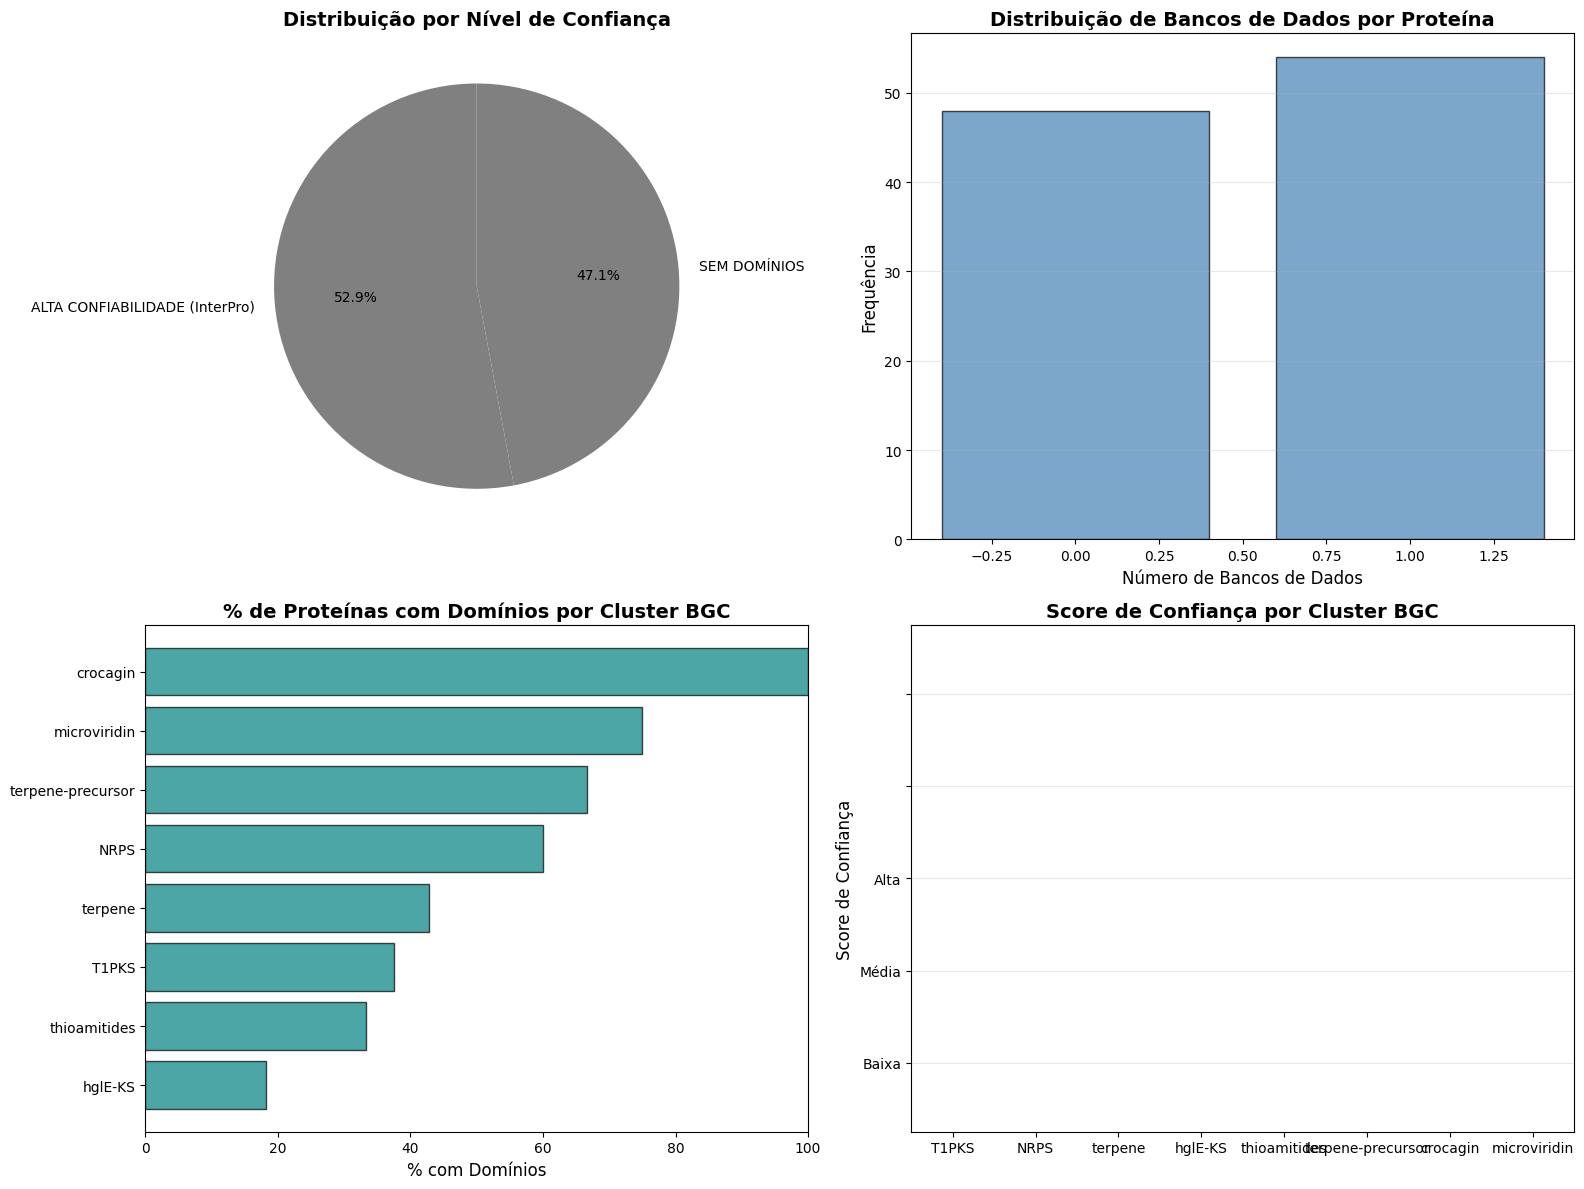

In [ ]:
# Visualizações de domínios
import matplotlib.pyplot as plt
import seaborn as sns

if len(df) > 0 and 'Domain_Confidence' in df.columns:
    print("="*70)
    print("VISUALIZAÇÕES: ANÁLISE DE DOMÍNIOS EM PROTEÍNAS DE LÍCHEN")
    print("="*70)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Subplot 1: Distribuição de confiança
    ax1 = axes[0, 0]
    confidence_data = df['Domain_Confidence'].value_counts()
    colors = {
        'Alta confiança (≥5 DBs)': '#2ecc71',
        'Média confiança (3-4 DBs)': '#f39c12',
        'Baixa confiança (1-2 DBs)': '#e74c3c',
        'Sem domínios': '#95a5a6'
    }
    plot_colors = [colors.get(x, 'gray') for x in confidence_data.index]

    wedges, texts, autotexts = ax1.pie(
        confidence_data.values,
        labels=confidence_data.index,
        autopct='%1.1f%%',
        colors=plot_colors,
        startangle=90
    )
    ax1.set_title('Distribuição por Nível de Confiança', fontsize=14, fontweight='bold')

    # Subplot 2: Número de bancos por sequência
    ax2 = axes[0, 1]
    db_dist = df['Domain_Num_Databases'].value_counts().sort_index()
    ax2.bar(db_dist.index, db_dist.values, color='steelblue', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Número de Bancos de Dados', fontsize=12)
    ax2.set_ylabel('Frequência', fontsize=12)
    ax2.set_title('Distribuição de Bancos de Dados por Proteína', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)

    # Subplot 3: Domínios por cluster BGC
    ax3 = axes[1, 0]
    cluster_dom = []
    for cluster in df['BGC_Cluster_Type'].unique():
        with_dom = len(df[(df['BGC_Cluster_Type'] == cluster) & (df['Domain_Num_Databases'] > 0)])
        total = len(df[df['BGC_Cluster_Type'] == cluster])
        pct = (with_dom / total * 100) if total > 0 else 0
        cluster_dom.append({'Cluster': cluster, 'Pct': pct})

    df_cluster_dom = pd.DataFrame(cluster_dom).sort_values('Pct', ascending=True)
    ax3.barh(range(len(df_cluster_dom)), df_cluster_dom['Pct'], color='teal', alpha=0.7, edgecolor='black')
    ax3.set_yticks(range(len(df_cluster_dom)))
    ax3.set_yticklabels(df_cluster_dom['Cluster'])
    ax3.set_xlabel('% com Domínios', fontsize=12)
    ax3.set_title('% de Proteínas com Domínios por Cluster BGC', fontsize=14, fontweight='bold')
    ax3.set_xlim(0, 100)

    # Subplot 4: Boxplot de confiança por cluster
    ax4 = axes[1, 1]

    # Preparar dados
    confidence_map = {
        'Alta confiança (≥5 DBs)': 3,
        'Média confiança (3-4 DBs)': 2,
        'Baixa confiança (1-2 DBs)': 1,
        'Sem domínios': 0
    }

    df['Confidence_Score'] = df['Domain_Confidence'].map(confidence_map)

    plot_data = []
    for cluster in df['BGC_Cluster_Type'].unique():
        cluster_data = df[df['BGC_Cluster_Type'] == cluster]
        plot_data.append({
            'Cluster': cluster,
            'Score': cluster_data['Confidence_Score'].values
        })

    cluster_names = [d['Cluster'] for d in plot_data]
    scores = [d['Score'] for d in plot_data]

    bp = ax4.boxplot(scores, labels=cluster_names, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)

    ax4.set_ylabel('Score de Confiança', fontsize=12)
    ax4.set_title('Score de Confiança por Cluster BGC', fontsize=14, fontweight='bold')
    ax4.set_yticklabels(['Nenhum', 'Baixa', 'Média', 'Alta'])
    ax4.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/domain_analysis_lichen.png', dpi=300, bbox_inches='tight')
    print("✅ Gráficos salvos em: outputs/domain_analysis_lichen.png\n")
    plt.show()

else:
    print("❌ Dados insuficientes para visualização")

### 4.5 Relatório Final: Proteínas de Líchen com Domínios Identificados

Gerar relatório detalhado das anotações de domínios encontradas.

In [ ]:
# Relatório final detalhado
if len(df) > 0 and 'Domain_Confidence' in df.columns:
    print("="*70)
    print("RELATÓRIO FINAL: DOMÍNIOS EM PROTEÍNAS HIPOTÉTICAS DE LÍCHEN")
    print("="*70)

    report_file = "outputs/relatorio_dominios_lichen.txt"

    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("="*70 + "\n")
        f.write("ANÁLISE DE DOMÍNIOS CONSERVADOS\n")
        f.write("Dataset: Proteínas Hipotéticas de Líchen\n")
        f.write("(Simbiose Fungi-Alga)\n")
        f.write("Baseado em: InterPro\n")
        f.write("="*70 + "\n\n")

        f.write("RESUMO EXECUTIVO\n")
        f.write("-"*70 + "\n")
        f.write(f"Total de proteínas analisadas: {len(df)}\n")

        with_dom = len(df[df['Domain_Num_Databases'] > 0])
        f.write(f"Proteínas com domínios identificados: {with_dom} ({with_dom/len(df)*100:.1f}%)\n")
        f.write(f"Proteínas sem domínios: {len(df) - with_dom} ({(len(df) - with_dom)/len(df)*100:.1f}%)\n\n")

        f.write("CLASSIFICAÇÃO POR CONFIANÇA\n")
        f.write("-"*70 + "\n")
        for conf in ['ALTA CONFIABILIDADE (InterPro)', 'SEM DOMÍNIOS']:
            count = len(df[df['Domain_Confidence'] == conf])
            if count > 0:
                f.write(f"{conf}: {count} ({count/len(df)*100:.1f}%)\n")
        f.write("\n")

        f.write("DISTRIBUIÇÃO POR TIPO DE CLUSTER BGC\n")
        f.write("-"*70 + "\n")
        for cluster in df['BGC_Cluster_Type'].unique():
            cluster_data = df[df['BGC_Cluster_Type'] == cluster]
            with_dom_cluster = len(cluster_data[cluster_data['Domain_Num_Databases'] > 0])
            f.write(f"\n{cluster}:\n")
            f.write(f"  Total de proteínas: {len(cluster_data)}\n")
            f.write(f"  Com domínios: {with_dom_cluster} ({with_dom_cluster/len(cluster_data)*100:.1f}%)\n")

            for conf in ['ALTA CONFIABILIDADE (InterPro)', 'SEM DOMÍNIOS']:
                count = len(cluster_data[cluster_data['Domain_Confidence'] == conf])
                if count > 0:
                    f.write(f"    - {conf}: {count}\n")

        f.write("\n" + "="*70 + "\n")
        f.write("TOP 15 PROTEÍNAS MELHOR ANOTADAS\n")
        f.write("="*70 + "\n\n")

        df_sorted = df[df['Domain_Num_Databases'] > 0].sort_values(
            ['Domain_Num_Databases', 'Domain_Count'],
            ascending=False
        ).head(15)

        for idx, (_, row) in enumerate(df_sorted.iterrows(), 1):
            f.write(f"{idx}. {row['FASTA_ID']}\n")
            f.write(f"   BGC: {row['BGC_Cluster_Type']} (Região {row['BGC_Region']})\n")
            f.write(f"   Bancos de dados: {row['Domain_Databases']}\n")
            f.write(f"   Número de domínios: {row['Domain_Count']}\n")
            f.write(f"   Confiança: {row['Domain_Confidence']}\n")
            f.write(f"   Domínios: {row['Domain_Names']}\n")
            f.write(f"   Sequência: {row['Translation'][:60]}...\n\n")

        f.write("="*70 + "\n")
        f.write("NOTAS SOBRE LIQUENS\n")
        f.write("="*70 + "\n\n")
        f.write("Características esperadas em proteínas de líchen:\n")
        f.write("1. Domínios de adesão fungi-alga (CAD, integrinas-like)\n")
        f.write("2. Proteínas de matriz extracelular modificada\n")
        f.write("3. Proteínas de sinalização específicas da simbiose\n")
        f.write("4. Enzimas de degradação de parede celular alteradas\n")
        f.write("5. Proteínas de defesa/imunidade específicas\n\n")
        f.write("Interpretação:\n")
        f.write("- Alta confiança: Domínios bem estabelecidos, funções previsíveis\n")
        f.write("- Sem domínios: Possíveis proteínas específicas de líchen ou anotação falhou\n")

    print(f"✅ Relatório salvo em: {report_file}")

    print(f"\n📊 RESUMO EXECUTIVO:")
    print(f"{'='*70}")
    print(f"Total de proteínas: {len(df)}")
    print(f"Com domínios: {with_dom} ({with_dom/len(df)*100:.1f}%)")

    print(f"\n🔐 DISTRIBUIÇÃO DE CONFIANÇA:")
    for conf in ['ALTA CONFIABILIDADE (InterPro)', 'SEM DOMÍNIOS']:
        count = len(df[df['Domain_Confidence'] == conf])
        if count > 0:
            print(f"   {conf}: {count}")

    print(f"\n{'='*70}")

else:
    print("❌ Execute as análises de domínios primeiro")

RELATÓRIO FINAL: DOMÍNIOS EM PROTEÍNAS HIPOTÉTICAS DE LÍCHEN
✅ Relatório salvo em: outputs/relatorio_dominios_lichen.txt

📊 RESUMO EXECUTIVO:
Total de proteínas: 102
Com domínios: 54 (52.9%)

🔐 DISTRIBUIÇÃO DE CONFIANÇA:
   ALTA CONFIABILIDADE (InterPro): 54
   SEM DOMÍNIOS: 48

